# ANALISIS EXPLORATORIO DE DATOS - MODULO 3
# AUTOR : CÉSAR MAYTA
DATASET : [kaggle](https://www.kaggle.com/datasets/raminhuseyn/dataset-from-tiktok)

In [1]:
!pip install kagglehub

In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("raminhuseyn/dataset-from-tiktok")
file = '/tiktok_dataset.csv'

path_file = path + file

print("Path to dataset files:", path_file)


Path to dataset files: /root/.cache/kagglehub/datasets/raminhuseyn/dataset-from-tiktok/versions/1/tiktok_dataset.csv


In [8]:
!ls /root/.cache/kagglehub/datasets/raminhuseyn/dataset-from-tiktok/versions/1

tiktok_dataset.csv


# IMPORTACIÓN DE LIBRERIAS

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# APARIENCIA DE GRAFICOS

In [4]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

# CARGA DE DATASET

In [12]:
tiktok_df = pd.read_csv(path_file)
tiktok_df.head(2)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0


# 1 - VALIDACIÓN DE DATOS Y ANALISIS DE NULOS

## 1.1 TIPOS DE DATOS Y CANTIDAD DE REGISTROS Y VARIABLES

In [13]:
tiktok_df.dtypes

,0
#,int64
claim_status,object
video_id,int64
video_duration_sec,int64
video_transcription_text,object
verified_status,object
author_ban_status,object
video_view_count,float64
video_like_count,float64
video_share_count,float64


In [14]:
tiktok_df.dtypes.value_counts()

,count
float64,5
object,4
int64,3


In [15]:
tiktok_df.shape

(19382, 12)

## 1.2 ANALISIS DE VALORES NULOS

In [16]:
tiktok_df.isnull().any()

,0
#,False
claim_status,True
video_id,False
video_duration_sec,False
video_transcription_text,True
verified_status,False
author_ban_status,False
video_view_count,True
video_like_count,True
video_share_count,True


In [17]:
tiktok_df.isnull().sum().sort_values(ascending=False)

,0
claim_status,298
video_transcription_text,298
video_view_count,298
video_like_count,298
video_share_count,298
video_download_count,298
video_comment_count,298
#,0
video_id,0
video_duration_sec,0


In [18]:
plot_null_tiktok = tiktok_df.isnull().melt(value_name='missing')
plot_null_tiktok

,variable,missing
0,#,False
1,#,False
2,#,False
3,#,False
4,#,False
...,...,...
232579,video_comment_count,True
232580,video_comment_count,True
232581,video_comment_count,True
232582,video_comment_count,True


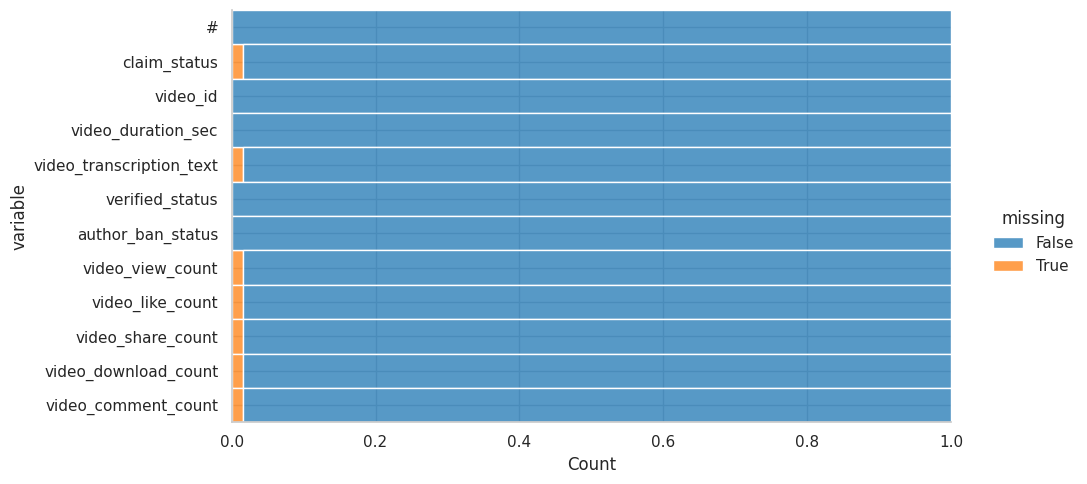

In [19]:
sns.displot(data=plot_null_tiktok,y='variable',hue='missing',aspect=2,multiple='fill')

<Axes: >

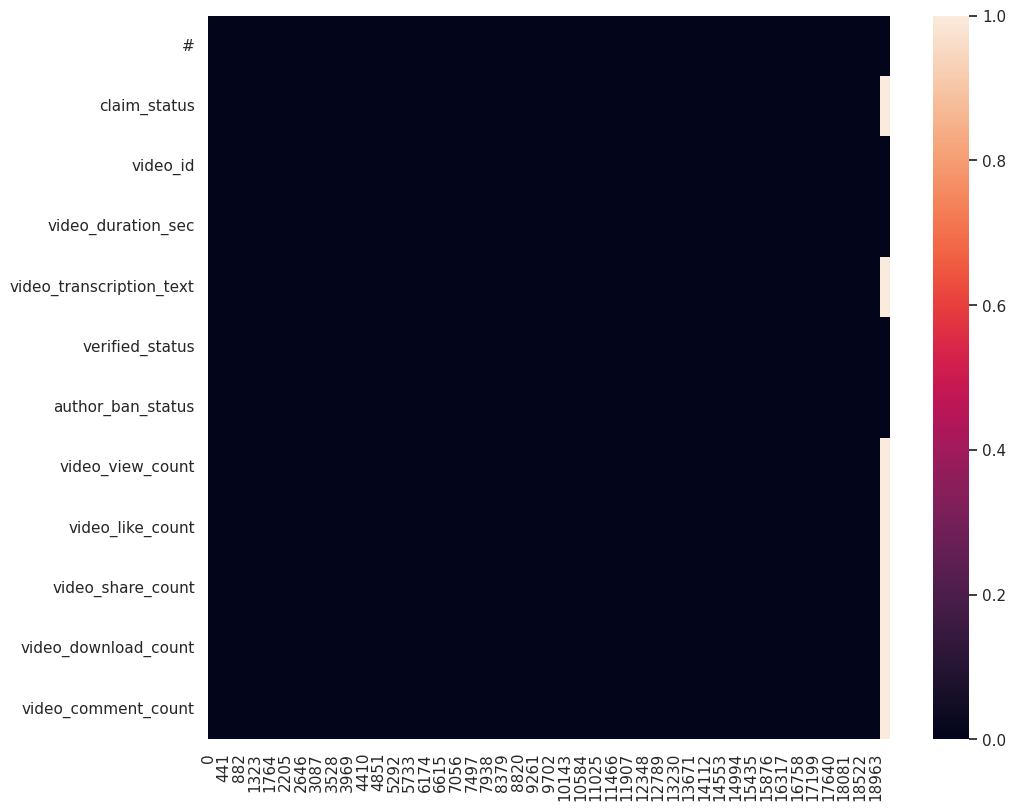

In [21]:
(
    tiktok_df
    .isnull()
    .transpose()
    .pipe(
        lambda df: sns.heatmap(data=df)
    )
)

### ¿ CUANTOS VALORES PERDERE SI ELIMINO LOS NULOS?

In [23]:
tiktok_df.shape[0]

19382

In [24]:
tiktok_df.dropna().shape[0]

19084

In [22]:
int(tiktok_df.shape[0]) - int(tiktok_df.dropna().shape[0])

298

### ELIMINAMOS LOS VALORES NULOS

In [26]:
tiktok_df.dropna(inplace=True)
tiktok_df.isnull().sum().sum()

0